# Welcome to my Capstone Project

## Box Office Analyzer

### About this project:

This program will allow the end user to analyze a period of box office results.  They will be able to look at things like, "Unique Films in Top 5", "Gross of New Openers During Period", "Total Box Office by Week during Period", etc.

The program will be interactive, meaning that we will start by asking the user what period (start and end date) that they would like to analyze and then give them option that provide back various statistics.

### Here is what we need to do to accomplish this.

1.  Check to see if a BoxOfficeDB.csv exists in the Data folder.
    If it does not, this is the first program run, so, create it with the appropriate headers
1. Read in the BoxOfficeDB.csv database file.
1. Ask the user to specify the Start Date and End Date to Analyze (allow for flexible date entry).
1. Create a Range with each unique Friday that is in the Analysis Period
1. Check to see which (if any) of those Fridays are already in the BO Database.
1. For the Fridays that we don't already have, fetch them from the-numbers.com and add them to the Box Office DB.
1. Save the updated Box Office DB for the future.  This will save on the number of times that we have to go to the-numbers.com and use their resources.
1. Present the user with the analytics that are supported by the program and ask them to choose.  Give the option to Quit.
1. Perform the analysis.
1. Repeat previous two steps until they Quit.


### Program Flow

import modules

create global variables:

class BoxOfficeEntry():
    
    self.friday_date
	self.bo_year
    self.bo_month
    self.bo_day
    self.bo_location
    self.title_id
    self.rank
    self.previous_rank
    self.title
    self.distributor
    self.distributor_id
    self.gross
    self.change_pct
    self.theaters
    self.per_theater
    self.total_gross
    self.weeks_in_release
    self.created_on 

class BoxOfficeAnalyzer():

    df_box_office_db = pd.DataFrame()
    
    def __init__(start_date, end_date):
        '''
        NOTE: On initialization, we will perform the following:
        1. Check for existings database
        2. Create one if it doesn't exist
        3. Read the database into a DataFrame
        4. Download missing weeks in the period that has been specified using the start_date and end_date
        5. Add them to the DataFrame
        6. Save the DataFrame as the updated boxofficedb.csv file for future runs.

        When you are ready to perform analysis, call the box_office.which_analysis() function.
    '''
    def add_box_office_entry(box_office_entry):
    
    def check_for_boxoffice_db():

    def create_boxoffice_db():

    def get_missing_bo_weekends():
    
    def which_analysis():
    
    def perform_analysisX():
    
    
def get_analysis_period():
    return start_date, end_date

def main():

    print("Welcome Box Office fans!")
    start_date, end_date = get_analysis_period()
    
    bo_analyzer = BoxOfficeAnalyzer(start_date, end_date)
    
    response = ""
    
    while response[0] not in ("q", "Q"):
        
        response = input("Would you like to perform another analysis? (y/q)")
        
        if response.lower() == "y":
            
            bo_analyzer.which_analysis()


    print("Thanks and see you at the movies!"


In [28]:
# Author: Jason Bubenicek
# Version: 0.1

In [1]:
# %matplotlib inline

# Modules
import time
import os
import requests
from datetime import datetime, timedelta
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display, HTML

In [2]:
# Global Variables
BOX_OFFICE_DB = './Data/BoxOfficeDB.csv'
BASE_URL = 'https://www.the-numbers.com/box-office-chart/weekend'
DEFAULT_START_DATE = "12/21/2018"
DEFAULT_END_DATE = "12/28/2018"
LOCATION = "Domestic"

In [27]:
# Class Definitions

class BoxOfficeEntry():
    '''
    Usage:
    As we fetch a row of weekend box office from
    the-numbers.com, create a BoxOfficeEntry.  A typical
    use will be to add it to the Box Office database, by
    passing it to a BoxOfficeAnalyzer.add_box_office_entry()
    method call
    
    Note:
    There are no variable to pass when instanciating this object.
    You will need to set each property after setup.
    '''

    friday_date        = None
    bo_year            = None
    bo_month           = None
    bo_day             = None
    bo_location        = None
    title_id           = None
    rank               = None
    previous_rank      = None
    title              = None
    distributor        = None
    distributor_id     = None
    gross              = None
    change_pct         = None
    theaters           = None
    per_theater        = None
    total_gross        = None
    weeks_in_release   = None
    created_on         = None
    
class BoxOfficeAnalyzer():
    '''
    Usage: This class will handle most everything that you need
    to perform various analysis, including fetching the data to
    be analyzed.  In most cases, you will only need a single copy
    of this class instanciated.
    '''
    
    # Create a Data Frame to store our Box Office Database.
    df_box_office_db = pd.DataFrame
    df_box_office_subset = pd.DataFrame
    
    def __init__(self, start_date, end_date):
        try:
            self.start_date = datetime.strptime(start_date, "%m/%d/%Y")
            self.end_date = datetime.strptime(end_date, "%m/%d/%Y")
        except ValueError:
            print("You did not pass a start or end date in m/d/Y format, setting default Start ({DEFAULT_START_DATE}) and End ({DEFAULT_END_DATE}) dates")
            self.start_date = datetime.strptime(DEFAULT_START_DATE, "%m/%d/%Y")
            self.end_date = datetime.strptime(DEFAULT_END_DATE, "%m/%d/%Y")
            
        if not self.check_for_boxoffice_db():
            print("Box Office DB does NOT exist.  Creating one...")
            
            if not self.create_boxoffice_db():
                print("Failed to create Box Office DB.\nThe program will exit.")
        
        if not self.read_box_office_database():
            print("Failed to load Box Office DB\nThe program will exit.")
            
        if not self.get_missing_bo_weekends():
            print("Failed to get missing Box Office Weekends.\nThe program will exit.")

        if not self.save_box_office_db():
            print("Failed to save Box Office DB...")
            
        if not self.__format_db():
            print("Failed to add Weekend Date column...")
                    
        rows, cols = self.df_box_office_db.shape
        print(f"Database details: Columns: {cols}, Rows: {rows}.")

        if not self.__filter_db():
            print("Failed to filter Box Office DB...")

        
        
        print("Ready for Analytics...")
    
    def __format_db(self):
        self.df_box_office_db[self.df_box_office_db.columns[8:9]] = self.df_box_office_db[self.df_box_office_db.columns[8:9]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
        self.df_box_office_db['Weekend_Date_str'] = self.df_box_office_db['bo_month'].astype(str) + "/" + self.df_box_office_db['bo_day'].astype(str) + '/' + self.df_box_office_db['bo_year'].astype(str)
        self.df_box_office_db["Weekend_Date_date"] = pd.to_datetime(self.df_box_office_db["Weekend_Date_str"], infer_datetime_format=True)
        self.df_box_office_db['gross$']=self.df_box_office_db['gross'].apply(self.format_bo)
        # self.df_box_office_db.columns = ['Day of Month', 'Location', 'Month', 'Year', 'Change %', 'Created On']
        
        return True
        
    def __filter_db(self):
        
        #df['Weekend_Date_str'].head()

        #df["Weekend_Date_date"] = pd.to_datetime(df["Weekend_Date_str"], infer_datetime_format=True)

        # df[["Weekend_Date_date", "title", "gross"]]
        # pd.DataFrame(df.loc[(df['Weekend_Date_date'] >= datetime(2018, 12,15) )]).head()
        df_filtered = pd.DataFrame(self.df_box_office_db.loc[(self.df_box_office_db['Weekend_Date_date'] >= self.start_date) & (self.df_box_office_db['Weekend_Date_date'] <= self.end_date)])
        df_filtered.head()
        
        rows, cols = df_filtered.shape
        print(f"Filtered Database details: Columns: {cols}, Rows: {rows}.")
        
        self.df_box_office_db = df_filtered
        
        return True
    
    
    def add_box_office_entry(self, box_office_entry):
        print("Added Entry")
        
    def read_box_office_database(self):
        print("Loading Box Office database...")
        self.df_box_office_db = pd.read_csv(BOX_OFFICE_DB)
        return True

    def save_box_office_db(self):
        print("Saving Box Office database...")
        try:
            self.df_box_office_db.to_csv(BOX_OFFICE_DB, index=False)
        except Exception as e:
            print(f"Exception: {e}")
            return False
        
        return True
        
    def check_for_boxoffice_db(self):
        print("Checking for existing Box Office Database in the Data folder...")
        return os.path.isfile(BOX_OFFICE_DB)
            
    def create_boxoffice_db(self):
        print("Creating a blank Box Office database...")
        date_to_fetch = self.start_date
            
        try:
            self.df_box_office_db = self.get_bo_weekend(date_to_fetch, verbose=False)
            if not self.save_box_office_db():
                return False
        except Exception as e:
            print(f"Exception: {e}")
            return False

        return True

                
                
        return True

    def get_missing_bo_weekends(self):
        print("Getting missing Box Office Weekends from 'the-numbers.com'...")
        
        unique_dates = pd.DataFrame(self.df_box_office_db, columns=['bo_year','bo_month', 'bo_day'])
        unique_dates.drop_duplicates(inplace=True)
        unique_dates['Weekend_Date_str'] = unique_dates['bo_month'].astype(str) + "/" + unique_dates['bo_day'].astype(str) + '/' + unique_dates['bo_year'].astype(str)
        unique_dates["Weekend_Date_date"] = pd.to_datetime(unique_dates["Weekend_Date_str"], infer_datetime_format=True)
        # unique_dates.head()
        
        for week in range(0, self.__get_num_weeks()+1):
            days_to_add = (week * 7)
            date_to_fetch = self.start_date  + timedelta(days=days_to_add)
            # print(f"Add {days_to_add} Days...")
            # print(self.start_date  + timedelta(days=days_to_add))
            print(f"Checking Box Office for {str(date_to_fetch)}.")
            if pd.DataFrame(unique_dates.loc[(unique_dates['Weekend_Date_date'] == date_to_fetch)])['bo_year'].count() == 0:
                print(f"Fetching Missing Box Office for {str(date_to_fetch)}...")
                
                try:
                    df_missing_bo_weekend = self.get_bo_weekend(date_to_fetch, verbose=False)

                    if self.__append_bo(df_missing_bo_weekend):
                        print(f"Appended Missing Box Office for {str(date_to_fetch)}...")
                    else:
                        print(f"Failed to Append Missing Box Office for {str(date_to_fetch)}...")
                    
                except Exception as e:
                    print(f"Failed to fetch Box Office for {str(date_to_fetch)}\n{e}.")



        # print(f"Number of Weeks: {str(self.__get_num_weeks())}")

        return True

    def __append_bo(self, df_bo_weekend):
        
        try:
            self.df_box_office_db = pd.concat([self.df_box_office_db, df_bo_weekend], sort=True, ignore_index=True)
            rows, cols = self.df_box_office_db.shape
            print(f"Database details: Columns: {cols}, Rows: {rows}.")
            
            # self.df_box_office_db.append(df_bo_weekend, sort=False, ignore_index=True)
            
        except Exception as e:
            print(f"Exception: {e}")
            return False
        
        return True
    
    def __get_num_weeks(self):
        friday1 = (self.start_date - timedelta(days=self.start_date.weekday()))
        friday2 = (self.end_date - timedelta(days=self.end_date.weekday()))

        return int(round((friday2 - friday1).days / 7))
        
    def get_bo_weekend(self,friday_date=datetime.strptime(DEFAULT_START_DATE, "%m/%d/%Y"), verbose=False):
        
        # Example URL                                    
        # https://www.the-numbers.com/box-office-chart/weekend/2018/11/23

        url = BASE_URL + '/' + str(friday_date.year) + "/" + str(friday_date.month).zfill(2) + "/" + str(friday_date.day).zfill(2)

        page_test = "Weekend Domestic Chart for "
        bo_weekend_parts = str(url).split('/')
        bo_year = bo_weekend_parts[5]
        bo_month = bo_weekend_parts[6]
        bo_day = bo_weekend_parts[7]
        bo_location = LOCATION

        page_response = requests.get(url, timeout=5)   

        df_boxoffice = pd.DataFrame()


        if page_response.status_code == 200:
            page_content = BeautifulSoup(page_response.content, "html.parser")    

            # Confirm that we have the right content before proceeding
            # some websites will redirect you when you attempt to access
            # a page that results in a error or does not exist.
            if str(page_content.find(attrs={'id': 'main'})).find(page_test) != -1:

                # Rank, Last Rank 	Movie	Distributor	Gross	Change	Thtrs.	Per Thtr.	Total Gross	Week
                #1	new	Night School	Universal	$27,257,615	 	3,010	$9,056	  $27,257,615	1

                for table_row in page_content.select("div#page_filling_chart center table tr"):
                    # Each tr (table row) has three td HTML elements (most people
                    # call these table cels) in it (first name, last name, and age)
                    cells = table_row.findAll('td')


                    if cells:
                        title_url_a = cells[2].select("b a")
                        distributor_url_a = cells[3].select("a")

                        rank = cells[0].text.strip()
                        previous_rank = cells[1].text.strip()
                        title = cells[2].text.strip()
                        title_id= str(str(title_url_a[0].get('href')).replace("#tab=box-office","").replace("/movie/",""))
                        distributor = cells[3].text.strip()
                        distributor_id= str(distributor_url_a[0].get('href')).replace("/market/distributor/","")
                        gross = cells[4].text.strip()
                        change_pct = cells[5].text.strip()
                        theaters = cells[6].text.strip()
                        per_theater = cells[7].text.strip()
                        total_gross = cells[8].text.strip()
                        weeks_in_release = cells[9].text.strip()

                        if verbose:
                            print("{0},{1},{2},{3},{4},{5},{6},{7},{8},{9},{10},{11},{11},{12},{13},{14}".format(
                                bo_year
                                , bo_month
                                , bo_day
                                , bo_location
                                , title_id
                                , rank
                                , previous_rank
                                , title
                                , distributor
                                , distributor_id
                                , gross
                                , change_pct
                                , theaters
                                , per_theater
                                , total_gross
                                , weeks_in_release
                                , datetime.now()))

                        df_row = pd.DataFrame([[
                            bo_year
                            , bo_month
                            , bo_day
                            , bo_location
                            , title_id
                            , rank
                            , previous_rank
                            , title
                            , distributor
                            , distributor_id
                            , gross
                            , change_pct
                            , theaters
                            , per_theater
                            , total_gross
                            , weeks_in_release
                            , datetime.now()]], 
                            columns=[
                            'bo_year'
                            , 'bo_month'
                            , 'bo_day'
                            , 'bo_location'
                            , 'title_id'
                            , 'rank'
                            , 'previous_rank'
                            , 'title'
                            , 'distributor'
                            , 'distributor_id'
                            , 'gross'
                            , 'change_pct'
                            , 'theaters'
                            , 'per_theater'
                            , 'total_gross'
                            , 'weeks_in_release'
                            , 'created_on'
                            ])

                        df_boxoffice = df_boxoffice.append(df_row)

        return df_boxoffice

    def which_analysis(self):
        
        response = 0
        reports = 5
        while response not in range(1,reports+1):
            
            # Reminder: range is up to, not including the last number.  So, this is will return 1, 2.
            try:
                print("Which analysis would you like to perform:")
                print("1. Unique Films in the Top 10 During Period")
                print("2. Total Weekend Box Office Per Week")
                print("3. Top 10 Results During Period")
                print("4. Top 5 Films")
                print("5. Top 10 Distributors")
                response = int(input(f"\nEnter a number between 1 and {reports}..."))
                
            except:
                print("You must enter a number.  Please try again.")
        
        # analysis_functions = [self.perform_analysis_0, self.perform_analysis_1, self.perform_head]
        # print(analysis_functions[response - 1]())

        if response == 1:
            self.unique_titles_in_top10()
        elif response == 2:
            self.total_bo_by_weekend()
        elif response == 3:
            self.top10_weekend_results()
        elif response == 4:
            self.top5_during_period()
        elif response == 5:
            self.top10_distribs()
        else:
            print("Unknown Analysis selected...")
        
    def unique_titles_in_top10(self):
        unique_titles = pd.DataFrame(self.df_box_office_db, columns=['Weekend_Date_date', 'title', 'gross'])
        unique_titles.drop_duplicates(inplace=True)
        #unique_titles[unique_titles.columns[2:]] = unique_titles[unique_titles.columns[2:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
        
        df_sum = unique_titles[['title', 'gross']].groupby(['title']).sum()
        df_sum.sort_values(['gross'], ascending=False, inplace=True)
        df_sum['gross$']=df_sum['gross'].apply(self.format_bo)
        
        # print(df_sum[['gross$']].head(10))
        df_top10 = df_sum.head(10)

        df_top10 = df_sum.head(10)
        df_top10.columns = ['Gross', 'Gross ($)']
        display(HTML(df_top10[['Gross ($)']].to_html()))
    
    def total_bo_by_weekend(self):
        df = pd.DataFrame(self.df_box_office_db, columns = ['Weekend_Date_date', 'gross'])
        #df[df.columns[1:]] = df[df.columns[1:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
        df_sum = df.groupby(['Weekend_Date_date']).sum()
        df_sum.sort_values(['Weekend_Date_date'], ascending=True, inplace=True)
        df_sum['gross$']=df_sum['gross'].apply(self.format_bo)
        
        # ax = df_sum.plot.bar()



        # print(df_sum[['gross$']].head(10))
        df_top10 = df_sum.head(10)
        df_top10.columns = ['Gross', 'Gross ($)']
        display(HTML(df_top10[['Gross ($)']].to_html()))
    
    def format_bo(self, x):
        return "${:.1f}m".format((x/1000000))
    
    def top5_during_period(self):
        
        df = pd.DataFrame(self.df_box_office_db, columns = ['Weekend_Date_date', 'title', 'gross'])
        #df[df.columns[1:]] = df[df.columns[1:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
        df["gross"] = pd.to_numeric(df["gross"])
        df.sort_values(['gross'], ascending=False, inplace=True)
        df['gross$']=df['gross'].apply(self.format_bo)
        df_top5 = df.head(5)
        df_top5.columns = ['Weekend', 'Title', 'Gross', 'Gross ($)']

        display(HTML(df_top5.to_html(index=False)))
        

        #ax = df_top5.sort_values(['Gross'], ascending=True).plot.barh(x='Title', y='Gross', rot=0)
        #ax.set_xlabel("Box Office (USD/m)")
        #ax.set_ylabel("Films")
        
    
    def top10_weekend_results(self):
        print("Performing head()..")
        df = pd.DataFrame(self.df_box_office_db, columns = ['Weekend_Date_date', 'title', 'gross'])
        #df[df.columns[2:]] = df[df.columns[2:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
        df.sort_values(['gross'], ascending=False, inplace=True)
        
        df_top10 = df.head()
        df_top10.columns = ['Weekend', 'Title', 'Gross ($)']
        
        # TODO: Work on formatting / Left Justify Strings and Currency Formatting.
        # df_top10.style.format({"Gross ($)": "${:,.2f}"})
        #df_top10.style.apply('text-align: left', subset=['Title'])

        # df_top10["Gross ($)"] = df_top10['Gross ($)'].map('${:,.2f}'.format)
        # df_top10['Gross ($)'].map('${:,.2f}'.format)
        
        # TODO: Resolve copy warning
        df_top10.loc[:,'Gross ($)'] = df_top10['Gross ($)'].map('${:,.2f}'.format)
        
        #df_top10 = df_top10.style.format({'Gross ($)':'${:,.2f}'})
        
        # df_top10['Gross ($)'].applymap("${0:.2f}".format)
        display(HTML(df_top10.to_html(index=False)))
        
    def top10_distribs(self):
        df = pd.DataFrame(self.df_box_office_db, columns = ['distributor', 'gross'])
        #df[df.columns[1:]] = df[df.columns[1:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
        df_sum = df.groupby(['distributor']).sum()
        df_sum.sort_values(['gross'], ascending=False, inplace=True)
        df_sum['gross$']=df_sum['gross'].apply(self.format_bo)
        df_sum.columns = ['Distributor', 'Gross ($)']
        
        
        #print(df_sum[['Gross ($)']].head(10))
        df_top10 = df_sum.head(10)
        df_top10.set_index('Distributor')
        
        display(HTML(df_top10[['Gross ($)']].to_html()))

    def get_friday_date(self,test_date):
        return test_date
        

def validate_date(input_date, first=datetime(1980, 1, 1),
                              last=datetime.now(),
                              fmt='%m/%d/%Y'):
    """Return a validated datetime.datetime or None.

    If the date has the wrong format return None, or if it is not in
    the range [first,last] also return None.  Otherwise return the
    input_date as a datetime.datetime object.

    """
    try:
        d = datetime.strptime(input_date, fmt)
        if not (first <= d <= last):
            raise ValueError
    except ValueError:
        return None
    else:
        return d

def get_date(message):
    '''
    Usage: Pass a message to ask the user to specify a date in mm/dd/yyyy format.  When properly
    validated, will return a date in string format.
    '''
    
    my_date = ""
    
    while my_date == "":
        
        my_date = input(message)
        
        if my_date == "":
            my_date = DEFAULT_START_DATE
            
        valid_date = validate_date(my_date)
        if valid_date is not None:
            break
        else:
            print("The date must be a valid Friday between 1980 and today.  Please try again...")
            my_date = ""
    
    return my_date

def start():
    '''
    Usage:
    Call start() to start Analyzing Box Office.
    '''
    print("\n\n\nWelcome to the Box Office Analyzer.")
    print("\nUsing this application, you can fetch any period of Weekend Box")
    print("Office results and perform variable analysis on the data.")
    print("\n\nLet's get started...\n\n")
    time.sleep(.300)
    
    start_date = get_date("Enter the first Friday date in the analysis period (mm/dd/yyyy):")
    end_date = get_date("Enter the last Friday date in the analysis period (mm/dd/yyyy):")
        
    # boa = BoxOfficeAnalyzer(start_date="11/16/2018", end_date="12/28/2018")
    boa = BoxOfficeAnalyzer(start_date=start_date, end_date=end_date)
    
    ready = ""
    
    # Continue to ask if the player would like to play until
    # they indicate that they want to Quit the game.
    while ready.lower() not in ["q", "quit", "exit", "end"]:

        ready = input("Would you like to perform an analysis? ('Yes', 'No', 'Quit')")

        if ready.lower() in ["y", "yes"]:
            clear_output()
            boa.which_analysis()
            
            ready = ""


    print("Thanks and see you at the movies!") 


In [26]:
start()




Welcome to the Box Office Analyzer.

Using this application, you can fetch any period of Weekend Box
Office results and perform variable analysis on the data.


Let's get started...


Enter the first Friday date in the analysis period (mm/dd/yyyy):10/5/2018
Enter the last Friday date in the analysis period (mm/dd/yyyy):10/26/2018
Checking for existing Box Office Database in the Data folder...
Loading Box Office database...
Getting missing Box Office Weekends from 'the-numbers.com'...
Checking Box Office for 2018-10-05 00:00:00.
Checking Box Office for 2018-10-12 00:00:00.
Checking Box Office for 2018-10-19 00:00:00.
Checking Box Office for 2018-10-26 00:00:00.
Saving Box Office database...
Database details: Columns: 20, Rows: 1167.
Filtered Database details: Columns: 20, Rows: 410.
Failed to filter Box Office DB...
Ready for Analytics...
Would you like to perform an analysis? ('Yes', 'No', 'Quit')q
Thanks and see you at the movies!


In [14]:
x = get_date("Enter the starting Friday of the analysis. (mm/dd/yyyy):")

Enter the starting Friday of the analysis. (mm/dd/yyyy):12/28/2018


In [47]:
boa.df_box_office_db[boa.df_box_office_db.columns[8:9]] = boa.df_box_office_db[boa.df_box_office_db.columns[8:9]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)

boa.df_box_office_db

,bo_day,bo_location,bo_month,bo_year,change_pct,created_on,distributor,distributor_id,gross,per_theater,previous_rank,rank,theaters,title,title_id,total_gross,weeks_in_release,Weekend_Date_str,Weekend_Date_date
0,16,Domestic,11,2018,NaN,2019-01-05 18:11:02.690621,Warner Bros.,Warner-Bros,62163104,"$14,932",new,1,"4,163",Fantastic Beasts: The Crime…,Fantastic-Beasts-The-Crimes-of-Grindelwald-(2018),"$62,163,104",1,11/16/2018,2018-11-16
1,16,Domestic,11,2018,-43%,2019-01-05 18:11:02.692616,Universal,Universal,38587130,"$9,318",(1),2,"4,141",Dr. Seussâ The Grinch,Dr-Seuss-The-Grinch-(2018),"$126,963,410",2,11/16/2018,2018-11-16
2,16,Domestic,11,2018,-49%,2019-01-05 18:11:02.693613,20th Century Fox,20th-Century-Fox,16042965,"$4,211",(2),3,"3,810",Bohemian Rhapsody,Bohemian-Rhapsody-(2018),"$128,228,824",3,11/16/2018,2018-11-16
3,16,Domestic,11,2018,NaN,2019-01-05 18:11:02.695608,Paramount Pictures,Paramount-Pictures,14504315,"$4,414",new,4,"3,286",Instant Family,Instant-Family-(2018),"$14,504,315",1,11/16/2018,2018-11-16
4,16,Domestic,11,2018,NaN,2019-01-05 18:11:02.697603,20th Century Fox,20th-Century-Fox,12361307,"$4,410",new,5,"2,803",Widows,Widows-(2018),"$12,361,307",1,11/16/2018,2018-11-16
5,16,Domestic,11,2018,-53%,2019-01-05 18:11:02.699597,Walt Disney,Walt-Disney,4772950,"$1,811",(4),6,"2,635",The Nutcracker and the Four…,Nutcracker-and-the-Four-Realms-The-(2018),"$43,965,640",3,11/16/2018,2018-11-16
6,16,Domestic,11,2018,-47%,2019-01-05 18:11:02.701593,Warner Bros.,Warner-Bros,4293663,"$2,136",(5),7,"2,010",A Star is Born,Star-is-Born-A-(2018),"$185,784,570",7,11/16/2018,2018-11-16
7,16,Domestic,11,2018,-63%,2019-01-05 18:11:02.703588,Paramount Pictures,Paramount-Pictures,3790251,"$1,326",(3),8,"2,859",Overlord,Overlord-(2018),"$17,683,140",2,11/16/2018,2018-11-16
8,16,Domestic,11,2018,-68%,2019-01-05 18:11:02.705583,Sony Pictures,Sony-Pictures,2501616,$854,(6),9,"2,929",The Girl in the Spiderâs Web,Girl-in-the-Spiders-Web-The,"$13,292,139",2,11/16/2018,2018-11-16
9,16,Domestic,11,2018,-67%,2019-01-05 18:11:02.706580,Paramount Pictures,Paramount-Pictures,2216073,"$1,703",(7),10,"1,301",Nobodyâs Fool,Nobodys-Fool-(2018),"$28,843,691",3,11/16/2018,2018-11-16


In [44]:


df = boa.df_box_office_db[['Weekend_Date_date', 'title', 'gross']].head()
df.columns = ['Weekend', 'Title', 'Gross ($)']
print(df.to_string(index=False))

Weekend                         Title    Gross ($)
2018-11-16  Fantastic Beasts: The Crime…  $62,163,104
2018-11-16       Dr. Seussâ The Grinch  $38,587,130
2018-11-16             Bohemian Rhapsody  $16,042,965
2018-11-16                Instant Family  $14,504,315
2018-11-16                        Widows  $12,361,307


In [15]:
print(x)

12/28/2018


In [16]:
def start():
    '''
    Usage:
    Call start() to start Analyzing Box Office.
    '''
    print("\n\n\nWelcome to the Box Office Analyzer.")
    print("\nUsing this application, you can fetch any period of Weekend Box")
    print("Office results and perform variable analysis on the data.")
    print("\n\nLet's get started...\n\n")
    
    start_date = get_date("Enter the first Friday date in the analysis period (mm/dd/yyyy):")
    end_date = get_date("Enter the last Friday date in the analysis period (mm/dd/yyyy):")
        
    # boa = BoxOfficeAnalyzer(start_date="11/16/2018", end_date="12/28/2018")
    boa = BoxOfficeAnalyzer(start_date=start_date, end_date=end_date)
    
    ready = ""
    
    # Continue to ask if the player would like to play until
    # they indicate that they want to Quit the game.
    while ready.lower() not in ["q", "quit", "exit", "end"]:

        ready = input("Would you like to perform an analysis? ('Yes', 'No', 'Quit')")

        if ready.lower() in ["y", "yes"]:
            clear_output()
            boa.which_analysis()
            
            ready = ""


    print("Thanks and see you at the movies!")  

In [4]:
start()

NameError: name 'start' is not defined

In [16]:
boa.df_box_office_db.head()


,bo_day,bo_location,bo_month,bo_year,change_pct,created_on,distributor,distributor_id,gross,per_theater,previous_rank,rank,theaters,title,title_id,total_gross,weeks_in_release
0,21,Domestic,12,2018,NaN,2019-01-07 10:01:42.772290,Warner Bros.,Warner-Bros,67873522,"$16,454",new,1,"4,125",Aquaman,Aquaman-(2018),"$72,573,522",1
1,21,Domestic,12,2018,NaN,2019-01-07 10:01:42.776280,Walt Disney,Walt-Disney,23523121,"$5,751",new,2,"4,090",Mary Poppins Returns,Mary-Poppins-Returns-(2018),"$32,337,792",1
2,21,Domestic,12,2018,NaN,2019-01-07 10:01:42.781297,Paramount Pictures,Paramount-Pictures,21654047,"$6,100",new,3,"3,550",Bumblebee,Bumblebee,"$21,654,047",1
3,21,Domestic,12,2018,-53%,2019-01-07 10:01:42.785293,Sony Pictures,Sony-Pictures,16463662,"$4,318",(1),4,"3,813",Spider-Man: Into The Spider…,Spider-Man-Into-The-Spider-Verse-3D-(2018),"$64,563,725",2
4,21,Domestic,12,2018,-46%,2019-01-07 10:01:42.788284,Warner Bros.,Warner-Bros,9500985,"$3,577",(2),5,"2,656",The Mule,Mule-The-(2018),"$35,204,450",2


In [15]:
boa.df_box_office_db[boa.df_box_office_db.columns[8:9]] = boa.df_box_office_db[boa.df_box_office_db.columns[8:9]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)


In [10]:
boa = BoxOfficeAnalyzer(start_date="11/16/2018", end_date="12/28/2018")

Checking for existing Box Office Database in the Data folder...
Loading Box Office database...
Getting missing Box Office Weekends from 'the-numbers.com'...
Checking Box Office for 2018-11-16 00:00:00.
Checking Box Office for 2018-11-23 00:00:00.
Checking Box Office for 2018-11-30 00:00:00.
Checking Box Office for 2018-12-07 00:00:00.
Checking Box Office for 2018-12-14 00:00:00.
Checking Box Office for 2018-12-21 00:00:00.
Checking Box Office for 2018-12-28 00:00:00.
Saving Box Office database...
Database details: Columns: 17, Rows: 563.
Ready for Analytics...


In [158]:
boa.which_analysis()

Which analysis would you like to perform:
1. Unique Films in the Top 10 During Period
2. Total Weekend Box Office Per Week
3. Get 1st 10 Rows
4. Top 5 Films
5. Top 10 Distributors

Enter a number between 1 and 5...1
                               gross$
title                                
Dr. Seussâ The Grinch       $126.3m
Aquaman                       $120.0m
Ralph Breaks The Internet     $118.8m
Fantastic Beasts: The Crime…  $115.5m
Creed II                       $70.7m
Spider-Man: Into The Spider…   $70.6m
Bohemian Rhapsody              $52.8m
Mary Poppins Returns           $51.9m
Instant Family                 $45.1m
Bumblebee                      $42.6m


In [91]:
boa.df_box_office_db.head(1000)

,bo_year,bo_month,bo_day,bo_location,title_id,rank,previous_rank,title,distributor,distributor_id,gross,change_pct,theaters,per_theater,total_gross,weeks_in_release,created_on,Weekend_Date_str,Weekend_Date_date
0,2018,11,16,Domestic,Fantastic-Beasts-The-Crimes-of-Grindelwald-(2018),1,new,Fantastic Beasts: The Crime…,Warner Bros.,Warner-Bros,"$62,163,104",NaN,"4,163","$14,932","$62,163,104",1,2019-01-05 18:11:02.690621,11/16/2018,2018-11-16
1,2018,11,16,Domestic,Dr-Seuss-The-Grinch-(2018),2,(1),Dr. Seussâ The Grinch,Universal,Universal,"$38,587,130",-43%,"4,141","$9,318","$126,963,410",2,2019-01-05 18:11:02.692616,11/16/2018,2018-11-16
2,2018,11,16,Domestic,Bohemian-Rhapsody-(2018),3,(2),Bohemian Rhapsody,20th Century Fox,20th-Century-Fox,"$16,042,965",-49%,"3,810","$4,211","$128,228,824",3,2019-01-05 18:11:02.693613,11/16/2018,2018-11-16
3,2018,11,16,Domestic,Instant-Family-(2018),4,new,Instant Family,Paramount Pictures,Paramount-Pictures,"$14,504,315",NaN,"3,286","$4,414","$14,504,315",1,2019-01-05 18:11:02.695608,11/16/2018,2018-11-16
4,2018,11,16,Domestic,Widows-(2018),5,new,Widows,20th Century Fox,20th-Century-Fox,"$12,361,307",NaN,"2,803","$4,410","$12,361,307",1,2019-01-05 18:11:02.697603,11/16/2018,2018-11-16
5,2018,11,16,Domestic,Nutcracker-and-the-Four-Realms-The-(2018),6,(4),The Nutcracker and the Four…,Walt Disney,Walt-Disney,"$4,772,950",-53%,"2,635","$1,811","$43,965,640",3,2019-01-05 18:11:02.699597,11/16/2018,2018-11-16
6,2018,11,16,Domestic,Star-is-Born-A-(2018),7,(5),A Star is Born,Warner Bros.,Warner-Bros,"$4,293,663",-47%,"2,010","$2,136","$185,784,570",7,2019-01-05 18:11:02.701593,11/16/2018,2018-11-16
7,2018,11,16,Domestic,Overlord-(2018),8,(3),Overlord,Paramount Pictures,Paramount-Pictures,"$3,790,251",-63%,"2,859","$1,326","$17,683,140",2,2019-01-05 18:11:02.703588,11/16/2018,2018-11-16
8,2018,11,16,Domestic,Girl-in-the-Spiders-Web-The,9,(6),The Girl in the Spiderâs Web,Sony Pictures,Sony-Pictures,"$2,501,616",-68%,"2,929",$854,"$13,292,139",2,2019-01-05 18:11:02.705583,11/16/2018,2018-11-16
9,2018,11,16,Domestic,Nobodys-Fool-(2018),10,(7),Nobodyâs Fool,Paramount Pictures,Paramount-Pictures,"$2,216,073",-67%,"1,301","$1,703","$28,843,691",3,2019-01-05 18:11:02.706580,11/16/2018,2018-11-16


In [77]:
print(boa.perform_head())

Performing head()..
  Weekend_Date_date                         title     gross
0        2018-11-16  Fantastic Beasts: The Crime…  62163104
1        2018-11-16       Dr. Seussâ The Grinch  38587130
2        2018-11-16             Bohemian Rhapsody  16042965
3        2018-11-16                Instant Family  14504315
4        2018-11-16                        Widows  12361307
None


In [143]:
unique_titles = pd.DataFrame(boa.df_box_office_db, columns=['Weekend_Date_date', 'title', 'gross'])
unique_titles.drop_duplicates(inplace=True)
unique_titles[unique_titles.columns[2:]] = unique_titles[unique_titles.columns[2:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
unique_titles.sort_values(['gross'], ascending=False, inplace=True)
unique_titles['gross$']=unique_titles['gross'].apply(format_bo)
unique_titles.set_index('title')
print(unique_titles[['Weekend_Date_date', 'title', 'gross$']].head(10))


,Weekend_Date_date,title,gross$
423,2018-12-21,Aquaman,$67.9m
0,2018-11-16,Fantastic Beasts: The Crime…,$62.2m
87,2018-11-23,Ralph Breaks The Internet,$56.2m
490,2018-12-28,Aquaman,$52.1m
1,2018-11-16,Dr. Seussâ The Grinch,$38.6m
88,2018-11-23,Creed II,$35.6m
341,2018-12-14,Spider-Man: Into The Spider…,$35.4m
89,2018-11-23,Dr. Seussâ The Grinch,$30.4m
90,2018-11-23,Fantastic Beasts: The Crime…,$29.4m
491,2018-12-28,Mary Poppins Returns,$28.4m


In [127]:
unique_titles.head()

,Weekend_Date_date,title,gross
0,2018-11-16,Fantastic Beasts: The Crime…,"$62,163,104"
1,2018-11-16,Dr. Seussâ The Grinch,"$38,587,130"
2,2018-11-16,Bohemian Rhapsody,"$16,042,965"
3,2018-11-16,Instant Family,"$14,504,315"
4,2018-11-16,Widows,"$12,361,307"


In [49]:
def format_bo(x):
    return "${:.1f}m".format((x/1000000))

In [52]:
df = pd.DataFrame(boa.df_box_office_db, columns = ['distributor', 'gross'])
df[df.columns[1:]] = df[df.columns[1:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
df_sum = df.groupby(['distributor']).sum()
df_sum.sort_values(['gross'], ascending=False).head(10)


,gross
distributor,
Warner Bros.,290008791
Walt Disney,181826831
Universal,164257434
Paramount Pictures,97165417
Sony Pictures,97157212
20th Century Fox,87558716
MGM,70706100
Lionsgate,19085606
STX Entertainment,13849674


In [63]:
df = pd.DataFrame(boa.df_box_office_db, columns = ['distributor', 'gross'])
df[df.columns[1:]] = df[df.columns[1:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
df_sum = df.groupby(['distributor']).sum()
df_sum.sort_values(['gross'], ascending=False, inplace=True)
df_sum['gross$']=df_sum['gross'].apply(format_bo)
# df_sum[['gross$']].head()
print(df_sum[['gross$']].head(10))

                     gross$
distributor                
Warner Bros.        $290.0m
Walt Disney         $181.8m
Universal           $164.3m
Paramount Pictures   $97.2m
Sony Pictures        $97.2m
20th Century Fox     $87.6m
MGM                  $70.7m
Lionsgate            $19.1m
STX Entertainment    $13.8m
Fox Searchlight      $13.0m


,title,gross$
167,Aquaman,$67.9m
386,Fantastic Beasts: The Crime…,$62.2m
473,Ralph Breaks The Internet,$56.2m
234,Aquaman,$52.1m
387,Dr. Seussâ The Grinch,$38.6m


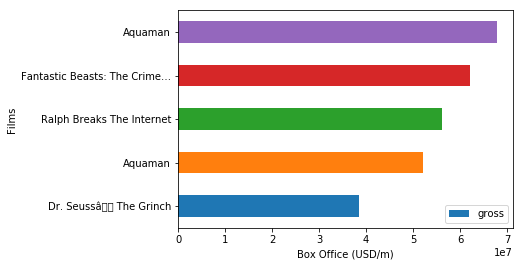

In [357]:
def formay(x):
    return "${:.1f}m".format((x/1000000))

df = pd.DataFrame(boa.df_box_office_db, columns = ['title', 'gross'])
df[df.columns[1:]] = df[df.columns[1:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
df["gross"] = pd.to_numeric(df["gross"])
df.sort_values(['gross'], ascending=False, inplace=True)
df['gross$']=df['gross'].apply(formay)
df_top5 = df.head(5)

ax = df_top5.sort_values(['gross'], ascending=True).plot.barh(x='title', y='gross', rot=0, )

# Set the x-axis label
ax.set_xlabel("Box Office (USD/m)")

# Set the y-axis label
ax.set_ylabel("Films")
df_top5[['title', 'gross$']].head()

In [316]:
boa.df_box_office_db.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,bo_day,bo_location,bo_month,bo_year,change_pct,created_on,distributor,...,gross,per_theater,previous_rank,rank,theaters,title,title_id,total_gross,weeks_in_release,Weekend_Date_str
0,0,0.0,0.0,14,Domestic,12,2018,NaN,2019-01-05 01:15:17.413480,Sony Pictures,...,"$35,363,376","$9,274",new,1,"3,813",Spider-Man: Into The Spider…,Spider-Man-Into-The-Spider-Verse-3D-(2018),"$35,363,376",1,12/14/2018
1,1,1.0,0.0,14,Domestic,12,2018,NaN,2019-01-05 01:15:17.417470,Warner Bros.,...,"$17,509,431","$6,766",new,2,"2,588",The Mule,Mule-The-(2018),"$17,509,431",1,12/14/2018
2,2,2.0,0.0,14,Domestic,12,2018,-22%,2019-01-05 01:15:17.421669,Universal,...,"$11,753,665","$3,127",(2),3,"3,759",Dr. Seussâ The Grinch,Dr-Seuss-The-Grinch-(2018),"$239,463,375",6,12/14/2018
3,3,3.0,0.0,14,Domestic,12,2018,-43%,2019-01-05 01:15:17.425448,Walt Disney,...,"$9,274,018","$2,594",(1),4,"3,575",Ralph Breaks The Internet,Ralph-Breaks-The-Internet-(2018),"$154,149,896",4,12/14/2018
4,4,4.0,0.0,14,Domestic,12,2018,NaN,2019-01-05 01:15:17.429690,Universal,...,"$7,559,850","$2,436",new,5,"3,103",Mortal Engines,Mortal-Engines-(2018),"$7,559,850",1,12/14/2018


In [252]:
df = pd.DataFrame(boa.df_box_office_db, columns = ['bo_year', 'bo_month', 'bo_day', 'title', 'gross'])
df[df.columns[4:]] = df[df.columns[4:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
df.sort_values(['gross'], ascending=False, inplace=True)
pd.DataFrame(df.loc[(df['bo_year'] == "2018") & df['bo_month'].isin(["12"])]).head()

df['Weekend_Date_str'] = df['bo_month'].astype(str) + "/" + df['bo_day'].astype(str) + '/' + df['bo_year'].astype(str)
df['Weekend_Date_str'].head()

df["Weekend_Date_date"] = pd.to_datetime(df["Weekend_Date_str"], infer_datetime_format=True)

# df[["Weekend_Date_date", "title", "gross"]]
# pd.DataFrame(df.loc[(df['Weekend_Date_date'] >= datetime(2018, 12,15) )]).head()
pd.DataFrame(df.loc[(df['Weekend_Date_date'] >= boa.start_date) & (df['Weekend_Date_date'] <= boa.end_date)]).head()

# df['Weekend_Date_date'] = datetime.strptime(df['Weekend_Date_str'], "%m/%d/%Y")
# df['Weekend_Date_date'].head()

# df[['bo_month', 'bo_day', 'bo_year']].head()
# df_subset.sort_values(['gross'], ascending=False, inplace=True)
# df_subset.head()

,bo_year,bo_month,bo_day,title,gross,Weekend_Date_str,Weekend_Date_date
0,2018,12,14,Spider-Man: Into The Spider…,35363376,12/14/2018,2018-12-14
0,2018,12,14,The Mule,17509431,12/14/2018,2018-12-14
0,2018,12,14,Dr. Seussâ The Grinch,11753665,12/14/2018,2018-12-14
0,2018,12,14,Ralph Breaks The Internet,9274018,12/14/2018,2018-12-14
0,2018,12,14,Mortal Engines,7559850,12/14/2018,2018-12-14


In [278]:


unique_dates = pd.DataFrame(boa.df_box_office_db, columns=['bo_year','bo_month', 'bo_day'])
unique_dates.drop_duplicates(inplace=True)
unique_dates['Weekend_Date_str'] = unique_dates['bo_month'].astype(str) + "/" + unique_dates['bo_day'].astype(str) + '/' + unique_dates['bo_year'].astype(str)
unique_dates["Weekend_Date_date"] = pd.to_datetime(unique_dates["Weekend_Date_str"], infer_datetime_format=True)
unique_dates.head()

for week in range(0, 1+1):
    days_to_add = (week * 7)
    date_to_fetch = boa.start_date  + timedelta(days=days_to_add)

    if pd.DataFrame(unique_dates.loc[(unique_dates['Weekend_Date_date'] == date_to_fetch)])['bo_year'].count() == 0:
        print(False)
    else:
        print(True)


True
False


In [249]:
boa.perform_head()

Performing head()..


,bo_year,bo_month,bo_day,title,gross
0,2018,12,14,Spider-Man: Into The Spider…,35363376
0,2018,12,14,The Mule,17509431
0,2018,12,14,Dr. Seussâ The Grinch,11753665
0,2018,12,14,Ralph Breaks The Internet,9274018
0,2018,12,14,Mortal Engines,7559850


In [251]:
boa.df_box_office_db

,bo_year,bo_month,bo_day,bo_location,title_id,rank,previous_rank,title,distributor,distributor_id,gross,change_pct,theaters,per_theater,total_gross,weeks_in_release,created_on
0,2018,12,14,Domestic,Spider-Man-Into-The-Spider-Verse-3D-(2018),1,new,Spider-Man: Into The Spider…,Sony Pictures,Sony-Pictures,"$35,363,376",,"3,813","$9,274","$35,363,376",1,2019-01-05 00:44:35.237374
0,2018,12,14,Domestic,Mule-The-(2018),2,new,The Mule,Warner Bros.,Warner-Bros,"$17,509,431",,"2,588","$6,766","$17,509,431",1,2019-01-05 00:44:35.239401
0,2018,12,14,Domestic,Dr-Seuss-The-Grinch-(2018),3,(2),Dr. Seussâ The Grinch,Universal,Universal,"$11,753,665",-22%,"3,759","$3,127","$239,463,375",6,2019-01-05 00:44:35.242358
0,2018,12,14,Domestic,Ralph-Breaks-The-Internet-(2018),4,(1),Ralph Breaks The Internet,Walt Disney,Walt-Disney,"$9,274,018",-43%,"3,575","$2,594","$154,149,896",4,2019-01-05 00:44:35.245398
0,2018,12,14,Domestic,Mortal-Engines-(2018),5,new,Mortal Engines,Universal,Universal,"$7,559,850",,"3,103","$2,436","$7,559,850",1,2019-01-05 00:44:35.248390
0,2018,12,14,Domestic,Creed-II-(2018),6,(3),Creed II,MGM,MGM,"$5,385,914",-46%,"3,107","$1,733","$104,870,060",4,2019-01-05 00:44:35.252379
0,2018,12,14,Domestic,Bohemian-Rhapsody-(2018),7,(5),Bohemian Rhapsody,20th Century Fox,20th-Century-Fox,"$4,314,179",-30%,"2,213","$1,949","$180,612,379",7,2019-01-05 00:44:35.257362
0,2018,12,14,Domestic,Instant-Family-(2018),8,(6),Instant Family,Paramount Pictures,Paramount-Pictures,"$3,790,287",-34%,"2,860","$1,325","$60,288,341",5,2019-01-05 00:44:35.261344
0,2018,12,14,Domestic,Fantastic-Beasts-The-Crimes-of-Grindelwald-(2018),9,(4),Fantastic Beasts: The Crime…,Warner Bros.,Warner-Bros,"$3,789,839",-46%,"2,606","$1,454","$151,793,249",5,2019-01-05 00:44:35.265334
0,2018,12,14,Domestic,Green-Book-(2018),10,(7),Green Book,Universal,Universal,"$2,774,630",-29%,"1,215","$2,284","$24,654,996",5,2019-01-05 00:44:35.269328


In [51]:
df = pd.DataFrame(boa.df_box_office_db, columns = ['distributor', 'gross'])
df[df.columns[1:]] = df[df.columns[1:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
df_sum = df.groupby(['distributor']).sum()
df_sum.sort_values(['gross'], ascending=False).head(10)


,gross
distributor,
Warner Bros.,290008791
Walt Disney,181826831
Universal,164257434
Paramount Pictures,97165417
Sony Pictures,97157212
20th Century Fox,87558716
MGM,70706100
Lionsgate,19085606
STX Entertainment,13849674


In [145]:
df2.head()

,title,bo_year
0,Tyler Perryâs Boo! A Made…,2016
1,Jack Reacher: Never Go Back,2016
2,Ouija: Origin of Evil,2016
3,The Accountant,2016
4,The Girl on the Train,2016


In [65]:
boa.get_missing_bo_weekends()

Getting missing Box Office Weekends from 'the-numbers.com'...
Number of Weeks: 2.0


True

In [133]:
print(datetime(2015, 2, 24, 13, 0))

2015-02-24 13:00:00


In [43]:
friday = "1/11/2019"
friday = "12/28/2018"
friday = "1/4/2019"
#str(datetime.now())
datetime.strptime(friday, "%m/%d/%Y") == datetime.strftime(datetime.now(), "%Y-%m-%d")

False

In [229]:
df_row = pd.DataFrame([[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]],
    columns=[
    'bo_year'
    , 'bo_month'
    , 'bo_day'
    , 'bo_location'
    , 'title_id'
    , 'rank'
    , 'previous_rank'
    , 'title'
    , 'distributor'
    , 'distributor_id'
    , 'gross'
    , 'change_pct'
    , 'theaters'
    , 'per_theater'
    , 'total_gross'
    , 'weeks_in_release'
    , 'created_on'
    ])

df_boxoffice = pd.DataFrame

df_boxoffice = df_boxoffice.append(df_row)

TypeError: append() missing 1 required positional argument: 'other'

In [23]:
try:
    date = datetime.strptime('12/283/2018', '%m/%d/%Y')
except ValueError:
    print("Date does not conform to format m/d/yyyy, therefore it failed to be parsed.  Setting the date to 1/4/2019")
    date = datetime.strptime('1/4/2019', '%m/%d/%Y')
    

type(date)
print(str(date.month).zfill(2))
print(str(date.day).zfill(2))
print(str(date.year))

Date does not conform to format m/d/yyyy, therefore it failed to be parsed.  Setting the date to 1/4/2019
01
04
2019


In [17]:
import datetime
 
today = datetime.date.today()
last_monday = today - datetime.timedelta(days=today.weekday())
coming_monday = today + datetime.timedelta(days=-today.weekday(), weeks=1)
print("Today:", today)
print("Last Monday:", last_monday)
print("Coming Monday:", coming_monday)

Today: 2019-01-04
Last Monday: 2018-12-31
Coming Monday: 2019-01-07


In [23]:
os.path.isfile(BOX_OFFICE_DB)

True

In [11]:
boe = BoxOfficeEntry()

In [13]:
boe.bo_year = 2019

In [14]:
boe.bo_year

2019